Testing Sentence Similarity

In [1]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


### Download Universal Sentence Encoder 

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [15]:
sentences = []
sentences += open(f"../resources/filtered/0.txt",encoding="utf-8").read().split('.')
sentences += open(f"../resources/filtered/1.txt",encoding="utf-8").read().split('.')
sentences += open(f"../resources/filtered/2.txt",encoding="utf-8").read().split('.')
non_empty = [sentence for sentence in sentences if len(sentence) > 0]
logging.set_verbosity(logging.ERROR)

vectors = embed(non_empty)


In [16]:
from sklearn import metrics
num_sent = np.shape(vectors)[0]
cosine = metrics.pairwise.cosine_similarity(vectors)
## kill off the diagonal
np.fill_diagonal(cosine, 0.0)
maxes = np.amax(cosine, 1)
#print(maxes)



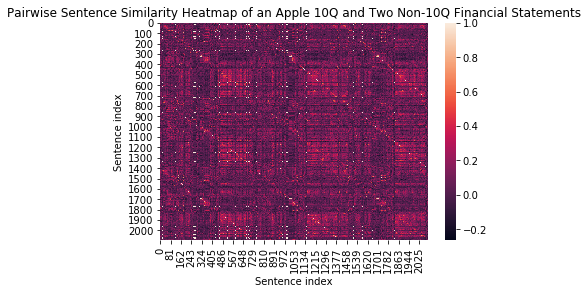

In [17]:
# %matplotlib ipympl
sns.heatmap(cosine)
plt.title("Pairwise Sentence Similarity Heatmap of 3 Apple 10 Qs")
plt.xlabel("Sentence index")
plt.ylabel("Sentence index")
plt.show()


range(0, 2095)


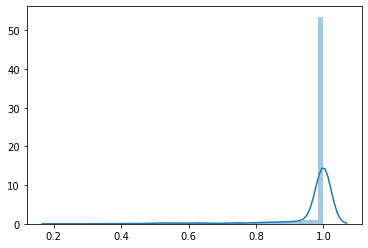

In [18]:
## plot histogram 
idcs = range(num_sent)
print(idcs)
sns.distplot(maxes)
# seaborn.scatterplot(list(range(num_sent)), maxes)


In [21]:
below_thresh = np.where(maxes < .98)
# print(below_thresh)
for low in below_thresh[0][:70]:
    if len(sentences[low])>1:
        print(sentences[low])

 As of June 30, 2018, the Company does not consider any of its investments to be other-than-temporarily impaired
To help protect the Company’s foreign currency–denominated term debt or marketable securities from fluctuations in foreign currency exchange rates, the Company may enter into forward contracts, cross-currency swaps or other instruments
 These instruments may offset a portion of the foreign currency remeasurement gains or losses, or changes in fair value
 The Company may designate these instruments as either cash flow or fair value hedges
 As of June 30, 2018, the Company’s hedged term debt– and marketable securities–related foreign currency transactions are expected to be recognized within 24 years
To help protect the Company’s foreign currency–denominated term debt or marketable securities from fluctuations in interest rates, the Company may enter into interest rate swaps, options or other instruments
 These instruments may offset a portion of the changes in interest income